In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
from statsrat import latent_cause as lc
from statsrat.expr.predef.pvl_no_iti import extinction
from statsrat.expr.predef.kitten import lrn_pred

In [2]:
print(lc.pars)
model = lc.model()
#trials = extinction.make_trials('experimental')
trials = lrn_pred.make_trials()
ds = model.simulate(trials, par_val = [1, 2, 0.1, 2, 2])

            min   max  default  \
resp_scale  0.0  10.0      1.0   
gamma       0.0  10.0      2.0   
alpha       0.0  40.0      0.5   
tilde_tau   0.0  40.0      2.0   
tilde_n     0.0  40.0      2.0   

                                                  description  
resp_scale         scales softmax/logistic response functions  
gamma       decay rate for exponential SCRP; higher -> fav...  
alpha       concentration parameter; higher -> tend to inf...  
tilde_tau   prior hyperparameter for eta (log-odds in Bern...  
tilde_n     prior value for n (sample size for each latent...  


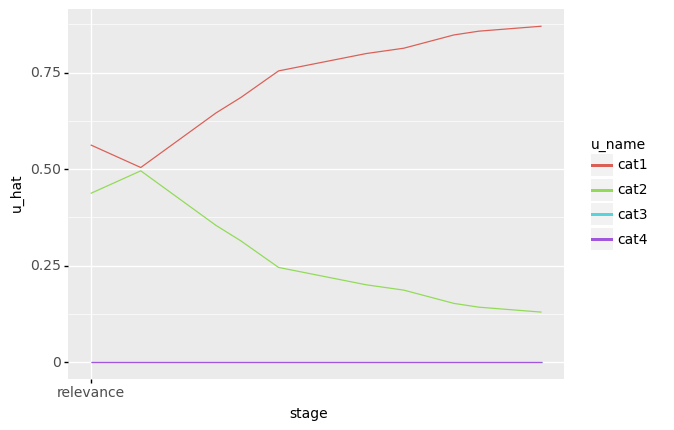

<ggplot: (300878445)>

In [3]:
#print(sr.learn_plot(ds, var = 'N'))
sr.learn_plot(ds, var = 'u_hat', sel = {'t': ds['trial_name'] == 'a.x -> cat1'})

In [4]:
print('phi')
print(ds['phi'].loc[{'t': range(5), 'z_name': range(3)}].values)
print('\n E_log_prior')
print(np.exp(ds['E_log_prior'].loc[{'t': range(5), 'z_name': range(3)}]).values)
print('\n E_log_lik_x')
print(np.exp(ds['E_log_lik_x'].loc[{'t': range(5), 'z_name': range(3)}]).values)
print('\n E_log_lik_y')
print(np.exp(ds['E_log_lik_y'].loc[{'t': range(5), 'z_name': range(3)}]).values)

phi
[[1.         0.         0.        ]
 [0.82122802 0.17877198 0.        ]
 [0.37092149 0.62907851 0.        ]
 [0.19622209 0.80377791 0.        ]
 [0.05897654 0.94102346 0.        ]]

 E_log_prior
[[1.         0.         0.        ]
 [0.35761621 0.4479899  0.        ]
 [0.42598202 0.3895062  0.        ]
 [0.39817621 0.34835698 0.        ]
 [0.35393332 0.31796256 0.        ]]

 E_log_lik_x
[[ 0.71653131  0.71653131  0.        ]
 [ 3.49034296  1.64872127  0.        ]
 [ 2.96050303  2.98692414  0.        ]
 [ 3.1761454   6.02087683  0.        ]
 [ 4.20232703 20.56788703  0.        ]]

 E_log_lik_y
[[1.94773404 1.94773404 0.        ]
 [5.29449005 1.94773404 0.        ]
 [0.94009347 1.72827201 0.        ]
 [1.40943436 3.48116383 0.        ]
 [1.65224911 5.99573373 0.        ]]


In [5]:
print(trials['ex_name'].values)

KeyError: 'ex_name'